In [41]:
import numpy as np
import matplotlib.pyplot as plt
from nalger_helper_functions import plot_rectangle, grid_interpolate, make_regular_grid, conforming_box

<ipython-input-65-25dab6987b83>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(XA, YA, A)
<ipython-input-65-25dab6987b83>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(XB, YB, B)


Text(0.5, 1.0, 'B')

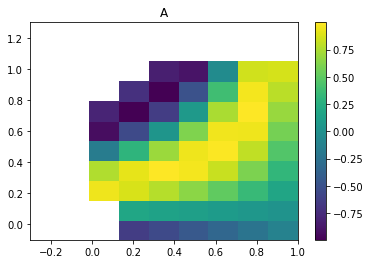

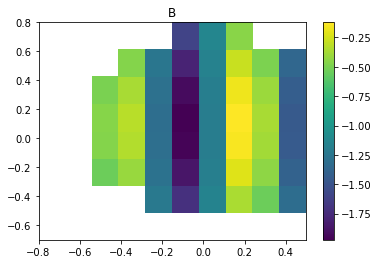

In [65]:
A_min = np.array([-0.3, -0.1])
A_max = np.array([1.0, 1.3])
A_shape = (10,12)
_, (XA, YA) = make_regular_grid(A_min, A_max, A_shape)
good_points_A = ((XA - 0.5)**2 + (YA - 0.4)**2) < 0.4
bad_points_A = np.logical_not(good_points_A)
A = np.zeros(A_shape)
A[good_points_A] = np.sin(2 * (1. - XA) * 4 * YA)[good_points_A]
A[bad_points_A] = np.nan

plt.figure()
plt.pcolor(XA, YA, A)
plt.colorbar()
plt.title('A')

B_min = np.array([-0.8, -0.7])
B_max = np.array([0.5, 0.8])
B_shape = (11,9)
_, (XB, YB) = make_regular_grid(B_min, B_max, B_shape)
good_points_B = ((XB - 0.0)**2 + (YB - 0.0)**2) < 0.4
bad_points_B = np.logical_not(good_points_B)
B = np.zeros(B_shape)
B[good_points_B] = (-1. +  (1. - XB**2 - YB**2) * np.sin(10.*XB))[good_points_B]
B[bad_points_B] = np.nan

plt.figure()
plt.pcolor(XB, YB, B)
plt.colorbar()
plt.title('B')

grid_hh= [0.14444444 0.12727273]


(-1.0, 1.5)

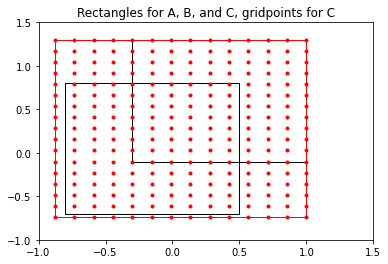

In [67]:
anchor_point = A_min

grid_hh = (A_max - A_min) / (np.array(A_shape) - 1.)
print('grid_hh=', grid_hh)

C_min0 = np.min([A_min, B_min], axis=0)
C_max0 = np.max([A_max, B_max], axis=0)

C_min, C_max, C_shape = conforming_box(C_min0, C_max0, anchor_point, grid_hh)
_, (XC, YC) = make_regular_grid(C_min, C_max, C_shape)

plt.figure()
plot_rectangle(A_min, A_max)
plot_rectangle(B_min, B_max)
plot_rectangle(C_min, C_max, edgecolor='r')
plt.plot(XC.reshape(-1), YC.reshape(-1), '.r')
plt.title('Rectangles for A, B, and C, gridpoints for C')

plt.xlim(-1.0, 1.5)
plt.ylim(-1.0, 1.5)

<ipython-input-85-552cdfd9f454>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(XC, YC, A_cgrid)
<ipython-input-85-552cdfd9f454>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(XC, YC, B_cgrid)
<ipython-input-85-552cdfd9f454>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'neare

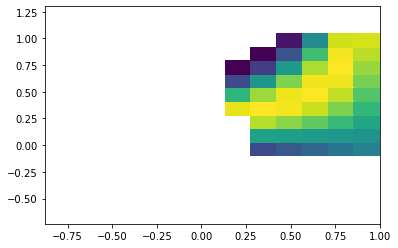

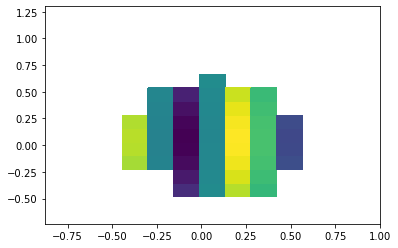

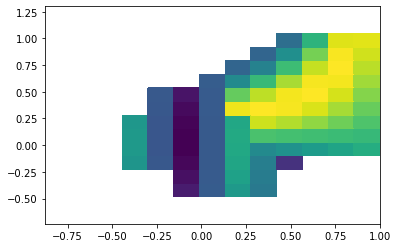

In [85]:
C_points = np.vstack([XC.reshape(-1), YC.reshape(-1)]).T

A_cgrid = grid_interpolate(A_min, A_max, A, C_points, fill_value=np.nan).reshape(C_shape)
B_cgrid = grid_interpolate(B_min, B_max, B, C_points, fill_value=np.nan).reshape(C_shape)

plt.figure()
plt.pcolor(XC, YC, A_cgrid)

plt.figure()
plt.pcolor(XC, YC, B_cgrid)

C = np.nan * np.ones(C_shape)

good_B_cgrid = np.logical_not(np.isnan(B_cgrid))
C[good_B_cgrid] = B_cgrid[good_B_cgrid]

good_A_cgrid = np.logical_not(np.isnan(A_cgrid))
C[good_A_cgrid] = A_cgrid[good_A_cgrid]

plt.figure()
plt.pcolor(XC, YC, C)